In [1]:
import wooldridge as woo
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_ols(x, y, data, results):
    fig, ax = plt.subplots(figsize=(10,6))
    plt.scatter(x, y, marker='o', facecolors='none', edgecolors='red', s=20)
    plt.plot(x, results.fittedvalues, color='black')
    plt.ylabel(y.name)
    plt.xlabel(x.name)
    plt.show()

Models without an intercept implies the regression line is forced to go through the origin.

In [2]:
ceosal1 = woo.dataWoo('ceosal1')

x = ceosal1['roe']
y = ceosal1['salary']

In [3]:
# usual ols

reg1 = smf.ols(formula='salary ~ roe', data=ceosal1)
results1 = reg1.fit()

print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.767
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0978
Time:                        21:35:30   Log-Likelihood:                -1804.5
No. Observations:                 209   AIC:                             3613.
Df Residuals:                     207   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    963.1913    213.240      4.517      0.0

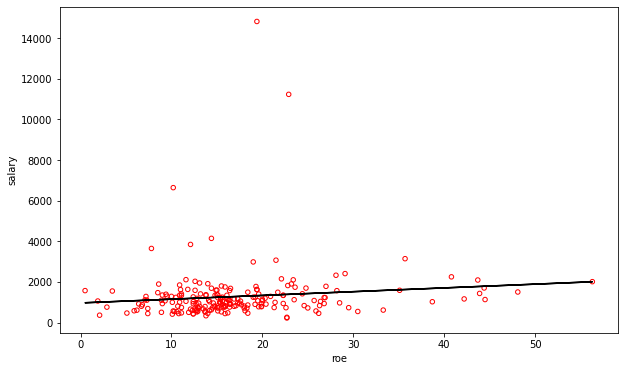

In [4]:
plot_ols(x, y, ceosal1, results1)

In [5]:
# regression without intercept (thrugh origin)

reg2 = smf.ols(formula='salary ~ 0 + roe', data=ceosal1)
results2 = reg2.fit()

print(results2.summary())

                                 OLS Regression Results                                
Dep. Variable:                 salary   R-squared (uncentered):                   0.422
Model:                            OLS   Adj. R-squared (uncentered):              0.419
Method:                 Least Squares   F-statistic:                              151.9
Date:                Sat, 04 Dec 2021   Prob (F-statistic):                    1.46e-26
Time:                        21:35:30   Log-Likelihood:                         -1814.4
No. Observations:                 209   AIC:                                      3631.
Df Residuals:                     208   BIC:                                      3634.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

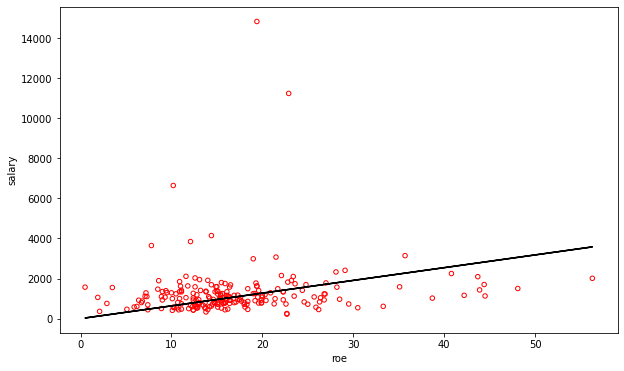

In [6]:
plot_ols(x, y, ceosal1, results2)

In [7]:
# regression on a constant

reg3 = smf.ols(formula='salary ~ 1', data=ceosal1)
results3 = reg3.fit()

print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 04 Dec 2021   Prob (F-statistic):                nan
Time:                        21:35:30   Log-Likelihood:                -1805.9
No. Observations:                 209   AIC:                             3614.
Df Residuals:                     208   BIC:                             3617.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1281.1196     94.927     13.496      0.0

In [8]:
# Regressing on a constant returns the sample average of the dependent variable
print(results3.params[0])
print(y.mean())

1281.1196172248804
1281.1196172248804
